In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

**Background**: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

**Objective**: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - \$650K and above.
The questions have been provided later in the document for which you can use tableau.

**Data**: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015.
These are the definitions of data points provided:
(You can find more detailed explanation in this [Link](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/))

- **Id**: Unique identification number for the property.
- **date**: date the house was sold.
- **price**: price of the house.
- **waterfront**: house which has a view to a waterfront.
- **condition**: How good the condition is (overall). **1** indicates worn out property and **5** excellent.
- **grade**: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- **Sqft_above**: square footage of house apart from basement.
- **Sqft_living15**: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- **Sqft_lot15**: lotSize area in 2015(implies - some renovations).

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a regression task, you can use linear regression  for building a model. You are also encouraged to use other models in your project if necessary.
To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using _matplotlib_ and _seaborn_ for developing visualizations.
The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables).
You can  also use tableau to visually explore the data further.

### Model

Build a regression model that best fits your data. You can use the measures of accuracies that have been discussed in class.

Framework DMAIC:
https://asq.org/quality-resources/dmaic#:~:text=Define%2C%20measure%2C%20analyze%2C%20improve%2C%20and%20control%20(DMAIC,phases%20shown%20in%20Figure%201

Zip code Map
https://www.zipdatamaps.com/98028

Define:
The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

For this ends, we will create 2 regression models: 1 general and the other for high tier houses
Measure:
 

ToDos
3. Review outliers y data integrity DONE
4. Review bedroom categorical conversion & outlier
5. Segmentar Seattle aun mas para crear una nueva variable ALMOST DONE

1. Remove duplicates by ID
2. Transform ft to m and review other required transformations
7. Speculation analysis: marginal increase in second and third sell per zip code / county OR house profile


3. Quitar year built y year remnovated DONE
6. Review inclusion of geo data DONE
8. List of counties per zip code DONE
5. Review year renovation to binary vs condition of house (categorical variable) DONE
5. Labeling cities DONE

Link to documentation about the data set: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [2]:
#df = pd.read_csv("C:/Users/fprie/OneDrive/Dokumente/GitHub/MidTermProject/kc_house_data.csv") ruta Fabian
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Measure phase

## Numerical variables

In [19]:
numerical = df.iloc[:,[2,3,4,5,6,7,12,13,14,15,19,20]].reset_index(drop=True)
numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503


## Correlation of Numerical variables

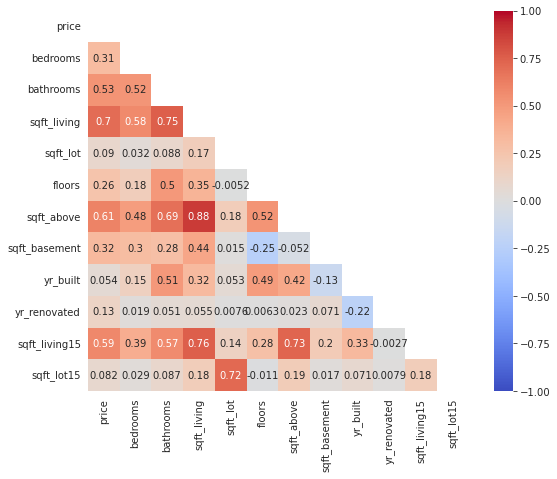

In [5]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

**sqft_above is highly correlated with sqft_living (.88)**

**sqft_living15 is highly correlated with sqft_living (.76)**

**sqft_lot15 is highly correlated with sqft_l0t (.72)**

In [6]:
#To verify that sqft_living = sqft_above + sqft_basement
(numerical["sqft_above"] + numerical["sqft_basement"]) - numerical["sqft_living"]

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Length: 21613, dtype: int64

**We remove ("sqft_above",'sqft_basement', "sqft_living15", "sqft_lot15")**

In [20]:
numerical = numerical.drop(["sqft_above",'sqft_basement', "sqft_living15", "sqft_lot15"], axis=1)
numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,1951,1991
2,180000.0,2,1.00,770,10000,1.0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,1965,0
4,510000.0,3,2.00,1680,8080,1.0,1987,0
...,...,...,...,...,...,...,...,...
19753,360000.0,3,2.50,1530,1131,3.0,2009,0
19754,400000.0,4,2.50,2310,5813,2.0,2014,0
19755,402101.0,2,0.75,1020,1350,2.0,2009,0
19756,400000.0,3,2.50,1600,2388,2.0,2004,0


## New Correlation

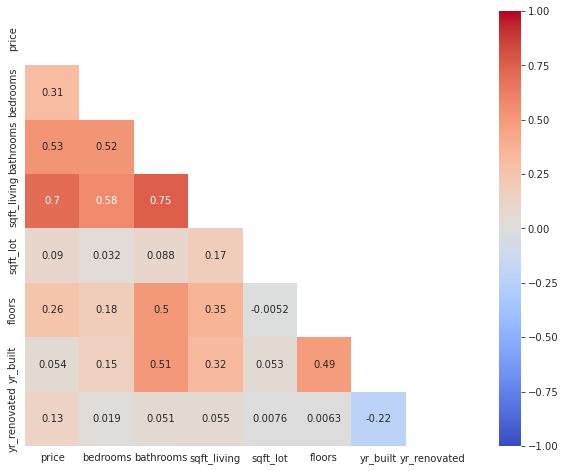

In [8]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Distribution of Numerical variables & X's vs Y plotting

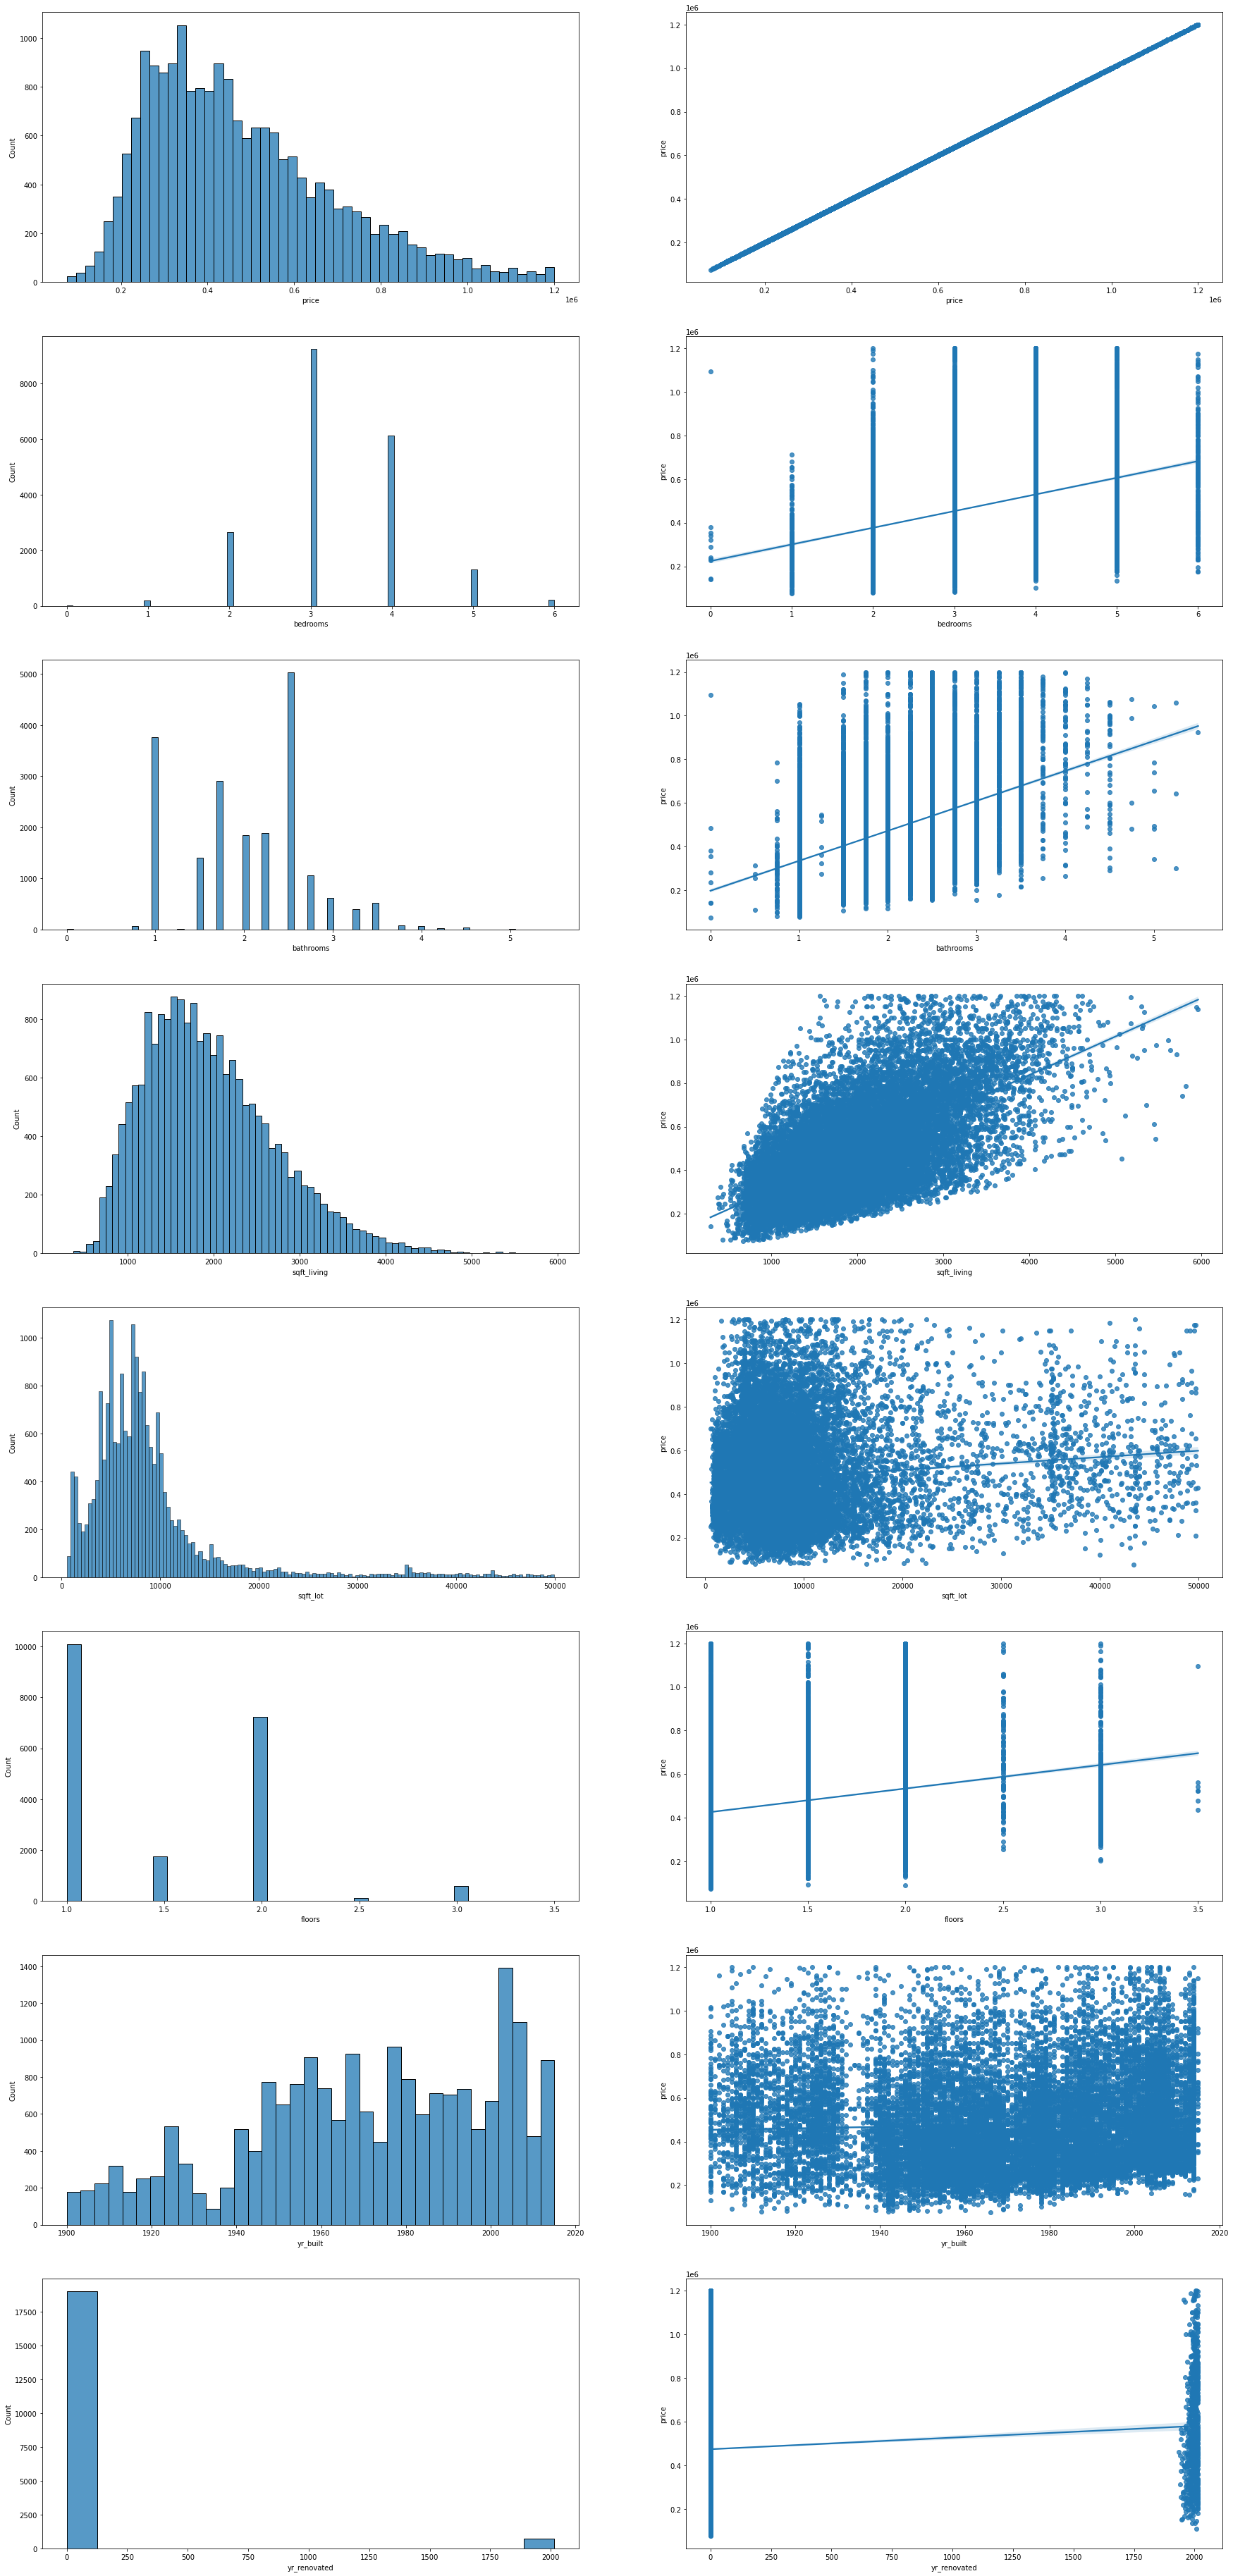

In [39]:
plt.subplots(figsize=(30, 100));
count=1
for i in numerical:
    plt.subplot(12,2,count);
    sns.histplot(numerical[i]);
    plt.subplot(12,2,count+1);
    sns.regplot(x=numerical[i],y=numerical.price);
    count+=2
plt.show();

#  1st - Linear Regresion - Numerical variables

In [9]:
X=numerical.drop('price', axis=1)
y=numerical.price
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated
0,3,1.00,1180,5650,1.0,1955,0
1,3,2.25,2570,7242,2.0,1951,1991
2,2,1.00,770,10000,1.0,1933,0
3,4,3.00,1960,5000,1.0,1965,0
4,3,2.00,1680,8080,1.0,1987,0


In [10]:
#First linear regression iteration, only numerical values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

print(X_train_scaled)
print("--------")
print(X_test_scaled)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

[[-0.39525584  1.79897315 -0.7722485  ...  0.93691404  1.18955273
  -0.21187196]
 [ 0.67295166  0.82545436  0.23203361 ...  0.93691404 -1.53121818
  -0.21187196]
 [ 0.67295166 -0.47257069  0.53768469 ... -0.91924683 -0.44290982
  -0.21187196]
 ...
 [-1.46346333 -1.44608948 -0.47751354 ... -0.91924683 -1.15711218
  -0.21187196]
 [-0.39525584  1.14996062 -0.56484241 ...  2.7930749   1.18955273
  -0.21187196]
 [ 0.67295166  0.5009481   0.24294972 ...  0.93691404  1.39361054
  -0.21187196]]
--------
[[ 0.67295166  0.5009481   0.45035581 ...  0.93691404  0.16926364
  -0.21187196]
 [-1.46346333 -1.44608948 -0.65217129 ... -0.91924683 -0.74899654
  -0.21187196]
 [-0.39525584  0.5009481   1.82578565 ...  0.93691404  1.01950454
  -0.21187196]
 ...
 [ 0.67295166  1.14996062  1.1053224  ...  0.93691404  0.23728291
  -0.21187196]
 [ 0.67295166 -0.47257069 -0.08453358 ...  0.0088336  -1.53121818
  -0.21187196]
 [ 0.67295166  0.5009481   0.49402025 ... -0.91924683  0.23728291
  -0.21187196]]
       

# Outliers 

In [12]:
# function to get IQR of a column
def out_iqr(column):
    df.sort_values(column)
    Q1 = df[column].quantile([.25]) # get 1st quartile
    Q3 = df[column].quantile([.75]) # get 2nd quartile
    IQR = np.array(Q3) - np.array(Q1) # get IQR
    lower_range = int((np.array(Q1)) - (1.5 * IQR)) #lower range
    upper_range = int((np.array(Q3)) + (1.5 * IQR)) #upper range
    return lower_range ,upper_range

In [13]:
# loop to run out_iqr function in all numerical columns
for col in numerical: 
    lowerbound,upperbound = out_iqr(col) # get IQR bouns of a column with out_iqr function
    outliers = numerical[col][(numerical[col] < lowerbound)|(numerical[col]>upperbound)] # defining outliers
    print(col,":",len(outliers),"outliers")
    #df[col].drop(outliers.index, inplace=True) # removing outliers from column

price : 1146 outliers
bedrooms : 347 outliers
bathrooms : 1877 outliers
sqft_living : 572 outliers
sqft_lot : 2425 outliers
floors : 8 outliers
yr_built : 0 outliers
yr_renovated : 914 outliers


## Filter

In [28]:
numerical.loc[numerical["sqft_lot"] > 50000 ]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated
5,1225000.0,4,4.50,5420,101930,1.0,2001,0
48,1350000.0,3,2.50,2753,65005,1.0,1953,0
69,1040000.0,5,3.25,4770,50094,1.0,1973,0
73,349000.0,3,1.75,1790,50529,1.0,1965,0
101,699950.0,3,2.25,2190,107593,2.0,1983,0
...,...,...,...,...,...,...,...,...
20914,1459000.0,4,4.00,4620,130208,2.0,2014,0
20922,915000.0,3,4.50,3850,62726,2.0,2013,0
20945,1408760.0,4,4.00,4920,50621,2.0,2012,0
20950,1450000.0,4,3.50,4300,108865,2.0,2014,0


### Removing Outliers

In [14]:
# Removing price observations
df.drop(df.loc[df['price']>1200000].index, inplace=True)
df.reset_index(inplace=True,drop=True)

In [15]:
# Removing bedrooms observations
df.drop(df.loc[df['bedrooms']>6].index, inplace=True)
df.reset_index(inplace=True,drop=True)

In [16]:
# Removing sqft_living observations
df.drop(df.loc[df['sqft_living']>6000].index, inplace=True)
df.reset_index(inplace=True,drop=True)

In [17]:
# Removing sqft_living observations
df.drop(df.loc[df['sqft_lot']>50000].index, inplace=True)
df.reset_index(inplace=True,drop=True)

# Categorical variables

In [21]:
categorical = df.iloc[:,[0,1,8,9,10,11,16,17,18]].reset_index(drop=True)
categorical

,id,date,waterfront,view,condition,grade,zipcode,lat,long
0,7129300520,20141013T000000,0,0,3,7,98178,47.5112,-122.257
1,6414100192,20141209T000000,0,0,3,7,98125,47.7210,-122.319
2,5631500400,20150225T000000,0,0,3,6,98028,47.7379,-122.233
3,2487200875,20141209T000000,0,0,5,7,98136,47.5208,-122.393
4,1954400510,20150218T000000,0,0,3,8,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...
19753,263000018,20140521T000000,0,0,3,8,98103,47.6993,-122.346
19754,6600060120,20150223T000000,0,0,3,8,98146,47.5107,-122.362
19755,1523300141,20140623T000000,0,0,3,7,98144,47.5944,-122.299
19756,291310100,20150116T000000,0,0,3,8,98027,47.5345,-122.069


In [22]:
categorical = categorical.drop(["id", "date"], axis=1)
categorical.head()

,waterfront,view,condition,grade,zipcode,lat,long
0,0,0,3,7,98178,47.5112,-122.257
1,0,0,3,7,98125,47.7210,-122.319
2,0,0,3,6,98028,47.7379,-122.233
3,0,0,5,7,98136,47.5208,-122.393
4,0,0,3,8,98074,47.6168,-122.045


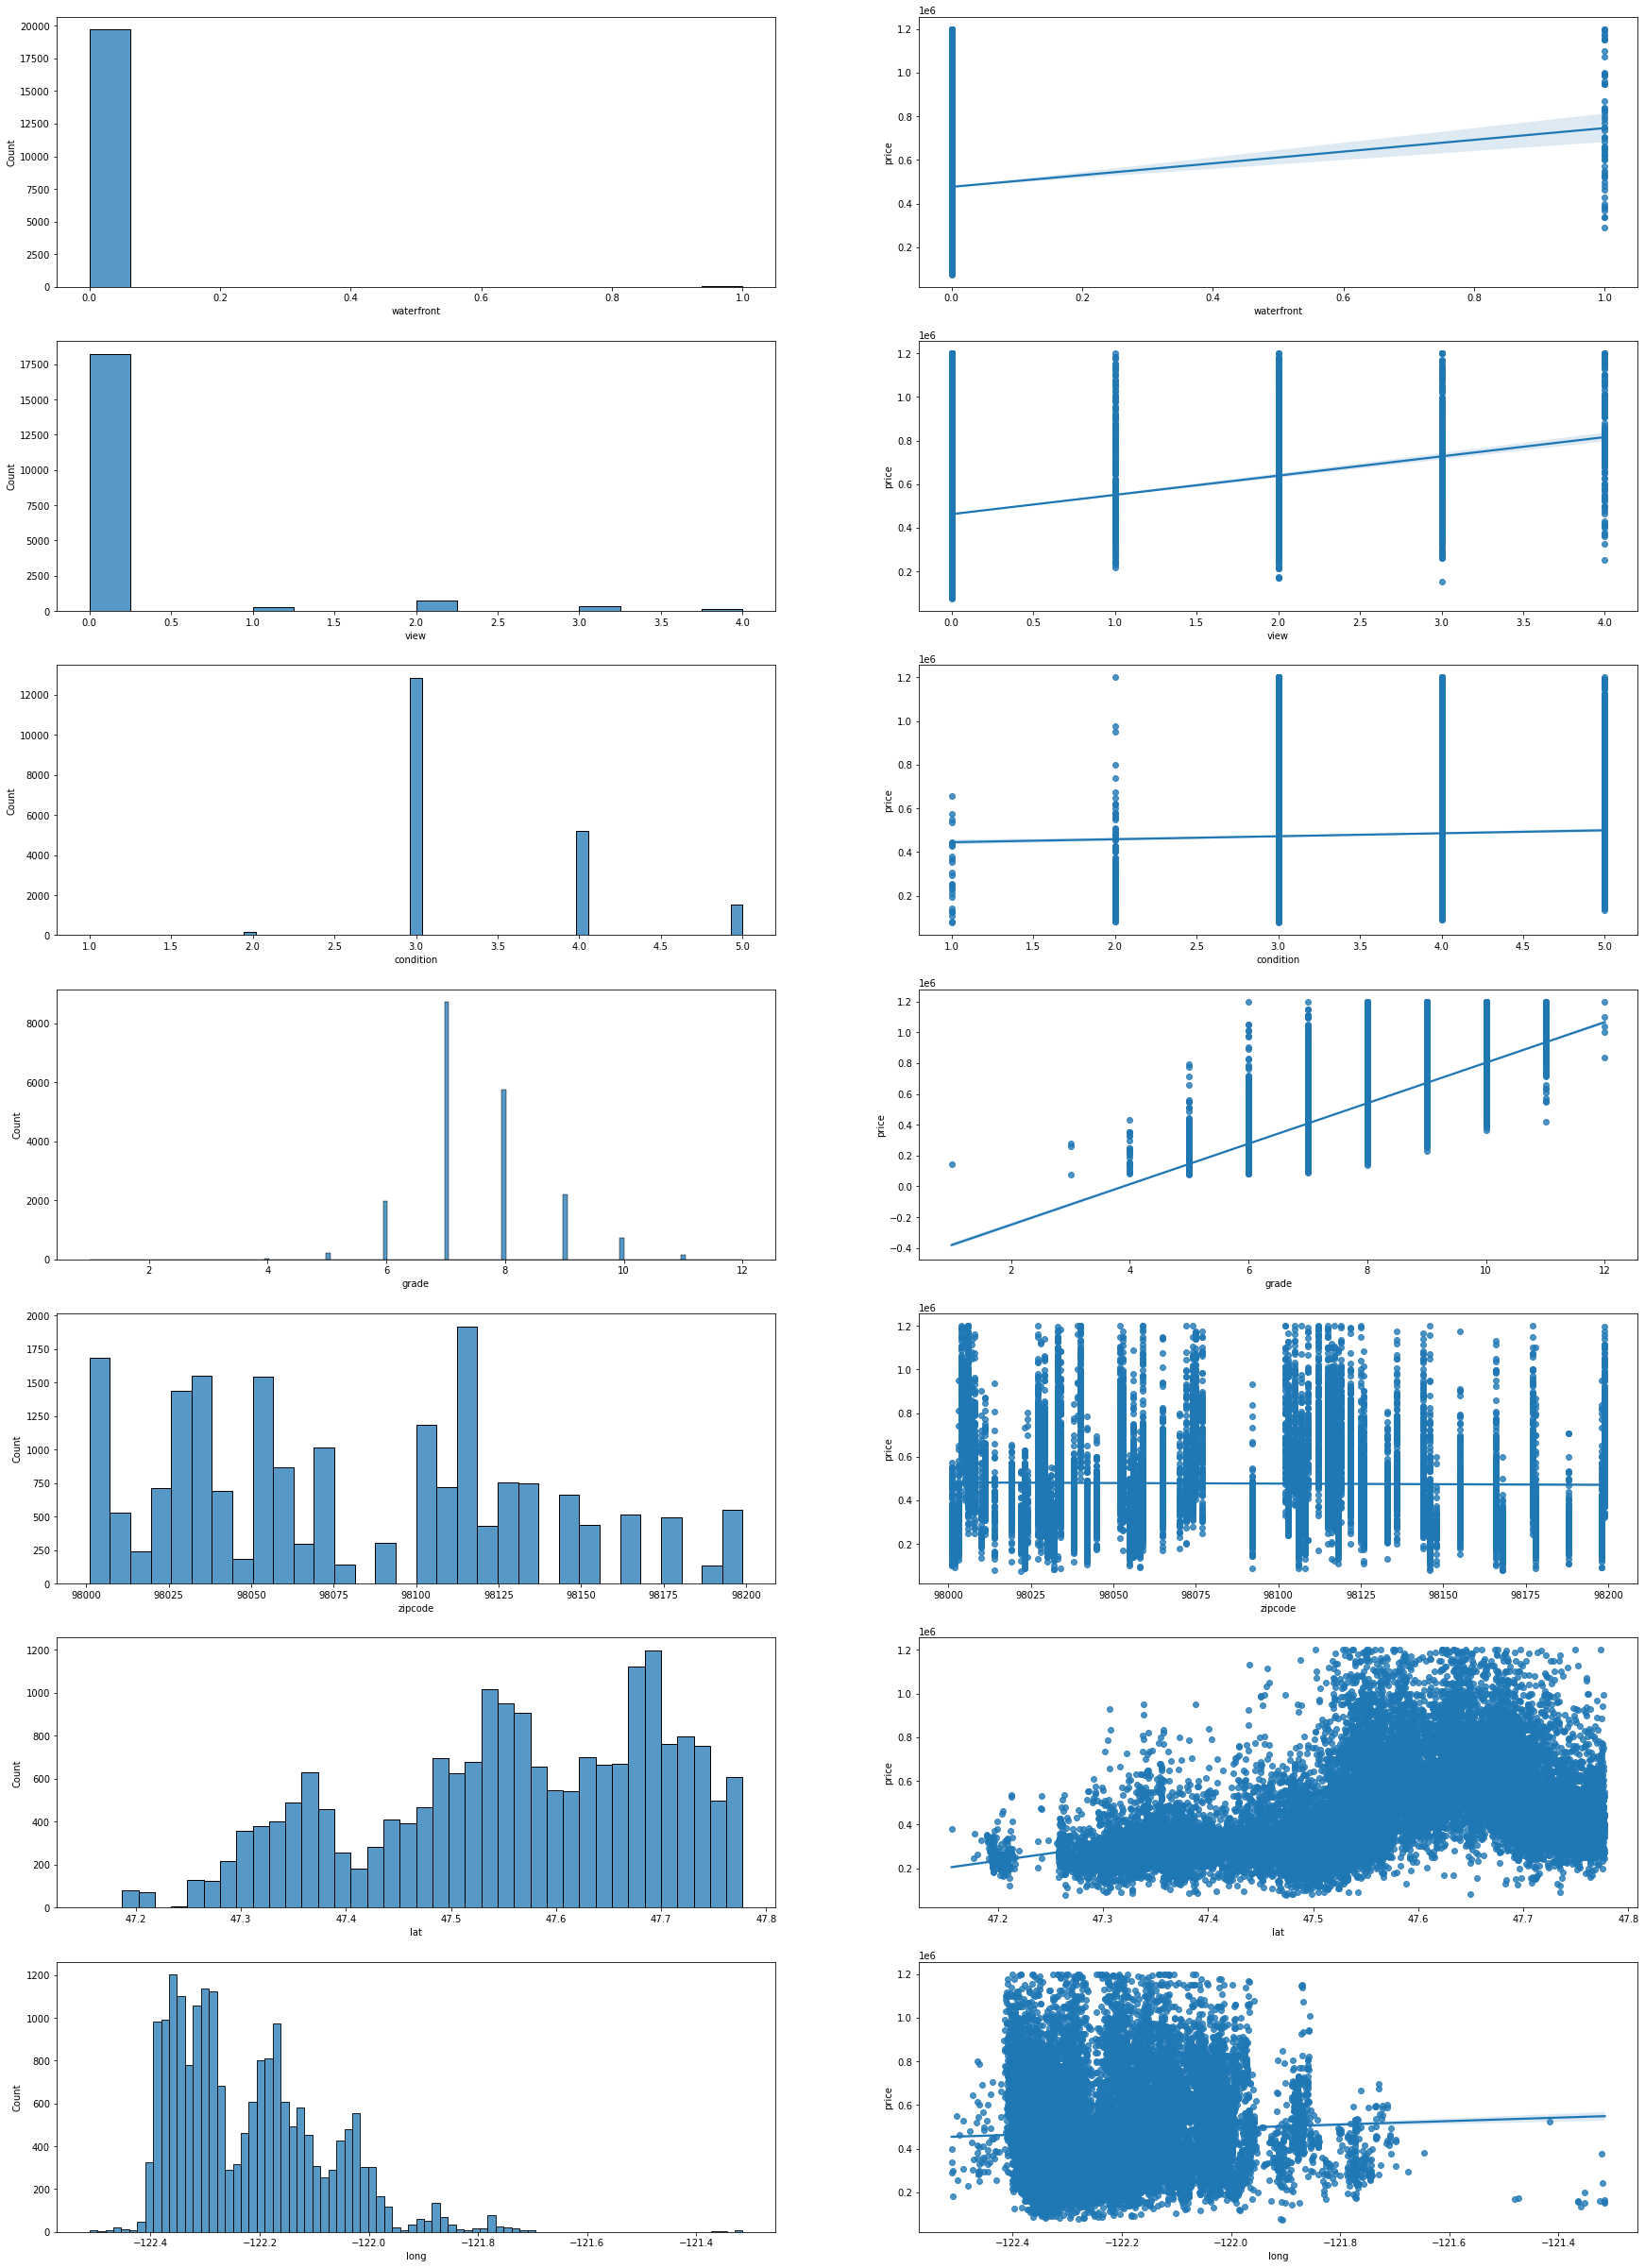

In [23]:
plt.subplots(figsize=(30, 100));
count=1
for i in categorical:
    plt.subplot(16,2,count);
    sns.histplot(categorical[i]);
    plt.subplot(16,2,count+1);
    sns.regplot(x=categorical[i],y=numerical.price);
    count+=2
plt.show();

## New variable ''condition_years"

In [24]:
categorical['renov'] = numerical['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

#  2nd - Linear Regresion - Numerical variables + Categorical

In [28]:
X=pd.concat([numerical,categorical],axis=1)
#X=X.drop('yr_renovated',axis=1)
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,waterfront,view,condition,grade,zipcode,lat,long,renov
0,221900.0,3,1.00,1180,5650,1.0,1955,0,0,0,3,7,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,1951,1991,0,0,3,7,98125,47.7210,-122.319,1
2,180000.0,2,1.00,770,10000,1.0,1933,0,0,0,3,6,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,1965,0,0,0,5,7,98136,47.5208,-122.393,0
4,510000.0,3,2.00,1680,8080,1.0,1987,0,0,0,3,8,98074,47.6168,-122.045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19753,360000.0,3,2.50,1530,1131,3.0,2009,0,0,0,3,8,98103,47.6993,-122.346,0
19754,400000.0,4,2.50,2310,5813,2.0,2014,0,0,0,3,8,98146,47.5107,-122.362,0
19755,402101.0,2,0.75,1020,1350,2.0,2009,0,0,0,3,7,98144,47.5944,-122.299,0
19756,400000.0,3,2.50,1600,2388,2.0,2004,0,0,0,3,8,98027,47.5345,-122.069,0


In [29]:
X=X.drop('price',axis=1)
y=numerical.price
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,waterfront,view,condition,grade,zipcode,lat,long,renov
0,3,1.00,1180,5650,1.0,1955,0,0,0,3,7,98178,47.5112,-122.257,0
1,3,2.25,2570,7242,2.0,1951,1991,0,0,3,7,98125,47.7210,-122.319,1
2,2,1.00,770,10000,1.0,1933,0,0,0,3,6,98028,47.7379,-122.233,0
3,4,3.00,1960,5000,1.0,1965,0,0,0,5,7,98136,47.5208,-122.393,0
4,3,2.00,1680,8080,1.0,1987,0,0,0,3,8,98074,47.6168,-122.045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19753,3,2.50,1530,1131,3.0,2009,0,0,0,3,8,98103,47.6993,-122.346,0
19754,4,2.50,2310,5813,2.0,2014,0,0,0,3,8,98146,47.5107,-122.362,0
19755,2,0.75,1020,1350,2.0,2009,0,0,0,3,7,98144,47.5944,-122.299,0
19756,3,2.50,1600,2388,2.0,2004,0,0,0,3,8,98027,47.5345,-122.069,0


In [30]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

print(X_train_scaled)
print("--------")
print(X_test_scaled)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

[[-0.37407191 -0.06219191 -0.60192384 ... -0.7968438   0.45019793
  -0.19587303]
 [-0.37407191 -0.41498686 -1.13853834 ... -2.1407289  -0.6006118
  -0.19587303]
 [-0.37407191 -0.41498686  1.09953676 ... -1.46483586 -0.76115218
  -0.19587303]
 ...
 [-0.37407191 -0.76778181 -0.20927909 ...  0.90833162 -1.20628686
  -0.19587303]
 [ 0.78484711 -0.76778181 -0.70662911 ... -1.01950782 -0.70277386
  -0.19587303]
 [-0.37407191  0.29060304  0.51056963 ...  0.87313634 -0.62250367
  -0.19587303]]
--------
[[-1.53299093 -1.4733717  -1.6228002  ...  1.47073784 -0.88520611
  -0.19587303]
 [-0.37407191 -0.06219191 -0.64118832 ... -1.88215133  1.01938654
  -0.19587303]
 [ 0.78484711  0.29060304 -0.06530934 ...  1.26315751  0.32614401
  -0.19587303]
 ...
 [-0.37407191 -0.41498686 -0.2354554  ...  1.23586321 -0.03872049
  -0.19587303]
 [-0.37407191 -0.76778181 -0.01295671 ...  0.94137209 -1.29385434
  -0.19587303]
 [ 0.78484711 -0.06219191 -0.24854356 ...  0.6461627  -1.32304349
   5.1053481 ]]
        

# Modeling using Scikit Learn

In [25]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [26]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront,view,condition,grade,zipcode,lat,long,renov
10152,3,2.00,1500,7828,1.0,1967,0,0,4,7,98058,47.4484,-122.158,0
5752,3,1.75,1090,7647,1.0,1994,0,0,3,7,98003,47.2613,-122.302,0
8311,3,1.75,2800,19386,1.0,1965,1,4,3,8,98198,47.3554,-122.324,0
9365,5,2.50,3280,6553,2.0,2012,0,0,3,9,98045,47.4750,-121.737,0
10609,3,2.00,1840,8140,1.0,1975,0,0,4,7,98003,47.3106,-122.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,4,2.50,1850,9136,2.0,1997,0,0,3,8,98059,47.4943,-122.157,0
7763,3,2.50,1530,9406,1.0,1993,0,0,3,7,98059,47.4852,-122.162,0
15377,3,1.50,1800,4700,1.0,1941,0,0,3,7,98117,47.6858,-122.385,0
17730,4,1.50,1420,8063,1.0,1962,0,0,3,7,98198,47.4174,-122.316,0


In [27]:
model.coef_

array([-11237.35171924,  15069.73256415,  78661.09869751, -10366.62519522,
        13340.18216035, -56288.4815519 ,   8234.45220885,  23929.86239591,
        17432.86407261,  87389.9820087 , -16660.04059943,  78864.32003237,
         -596.32366306,   4919.12182959])

In [28]:
model.intercept_

478240.36587129446

## Feature importances

In [29]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [30]:
features_importances

,Attribute,Importance
9,grade,87389.982009
11,lat,78864.320032
2,sqft_living,78661.098698
5,yr_built,56288.481552
7,view,23929.862396
8,condition,17432.864073
10,zipcode,16660.040599
1,bathrooms,15069.732564
4,floors,13340.182160
0,bedrooms,11237.351719


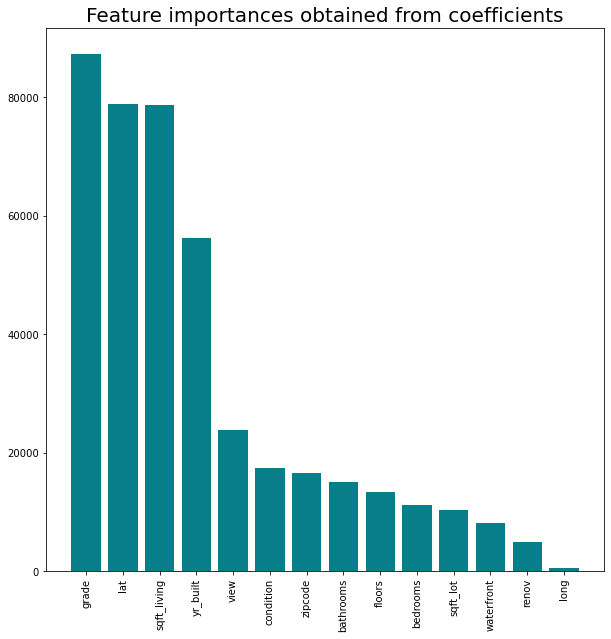

In [41]:
plt.subplots(figsize=(10, 10));
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show();

## Prediction

In [60]:
y_pred_test=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [62]:

y_pred_test

array([909064.30822857, 397047.02454948, 298024.03325788, ...,
       246647.23975194, 721667.25299847, 791942.80505832])

In [63]:
y_pred_train

array([801337.7401576 , 597954.77123112, 799378.67041364, ...,
       496157.99496112, 374794.06712756, 348714.15878552])

## Evaluating Model Performance

In [75]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test})

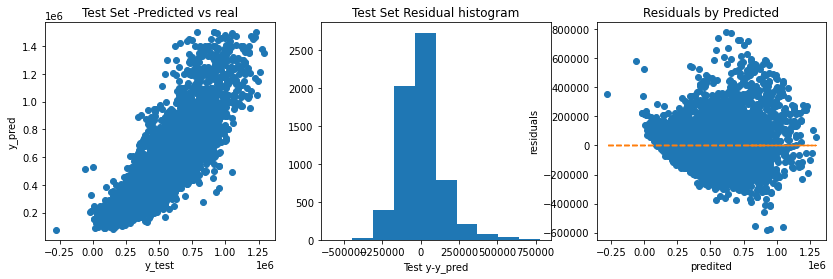

In [83]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4));
ax[0].plot(y_pred_test, y_test, 'o');
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test);
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test,y_test - y_pred_test,"o");
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test,np.zeros(len(y_pred_test)),linestyle='dashed');

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

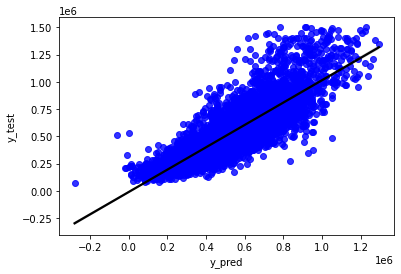

In [84]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

## Error metrics

In [85]:
print(mse(y_test,y_pred_test))
print(mae(y_test,y_pred_test))

18355425349.83958
98230.09809866172


In [87]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print(R2_test)
print(R2_train)

0.707995649142531
0.7022831462965841


# ZIP to Dummies

In [48]:
zip_df = categorical[["zipcode"]]
zip_df

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
19753,98103
19754,98146
19755,98144
19756,98027


In [49]:
zip_cat = pd.read_excel("zip.xlsx")

In [50]:
zip_cod = zip_cat[['zipcode',"zip"]]
zip_cod

,zipcode,zip
0,98092,z1
1,98077,z2
2,98075,z3
3,98074,z4
4,98072,z5
5,98070,z6
6,98065,z7
7,98059,z8
8,98058,z9
9,98056,z10


In [51]:
zip_zipcod = pd.merge(zip_df, 
                      zip_cod,
                      on ="zipcode", 
                      how ="inner")
zip_zipcod

,zipcode,zip
0,98178,z41
1,98178,z41
2,98178,z41
3,98178,z41
4,98178,z41
...,...,...
19753,98039,z37
19754,98039,z37
19755,98039,z37
19756,98039,z37


In [52]:
zip_dum = zip_zipcod['zip']
zip_dumies=pd.get_dummies(zip_dum, drop_first=True)
zip_dumies

,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,...,z64,z65,z66,z67,z68,z69,z7,z70,z8,z9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
categorical_dum = pd.concat([categorical,zip_dumies],axis=1)
categorical_dum

,waterfront,view,condition,grade,zipcode,lat,long,z10,z11,z12,...,z64,z65,z66,z67,z68,z69,z7,z70,z8,z9
0,0,0,3,7,98178,47.5112,-122.257,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,3,7,98125,47.7210,-122.319,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,6,98028,47.7379,-122.233,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,5,7,98136,47.5208,-122.393,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,8,98074,47.6168,-122.045,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19753,0,0,3,8,98103,47.6993,-122.346,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19754,0,0,3,8,98146,47.5107,-122.362,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19755,0,0,3,7,98144,47.5944,-122.299,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19756,0,0,3,8,98027,47.5345,-122.069,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## predicting on new data

In [ ]:
## new record 
new_data=[2,80,12,0.15]
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,13))

In [64]:
np.array(np.array(new_data).reshape(-1,13)).shape

NameError: name 'new_data' is not defined

## Power Transformation

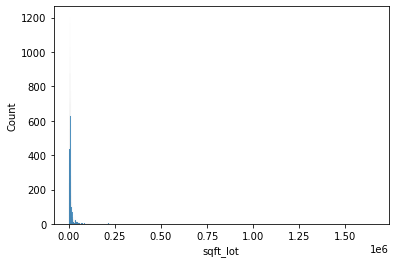

In [139]:
sns.histplot(numerical['sqft_lot']);

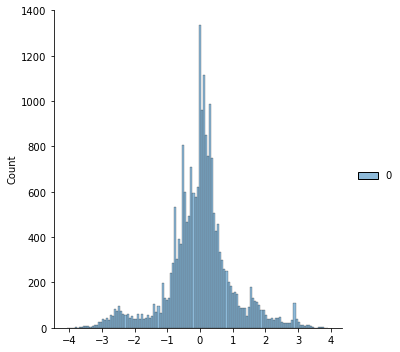

In [140]:
pt = PowerTransformer()
sqft_lot_transformed=pt.fit_transform(numerical['sqft_lot'].to_numpy().reshape(-1,1))
sns.displot(sqft_lot_transformed)

In [141]:
sqft_lot_transformed

array([[-0.32932672],
       [-0.0297149 ],
       [ 0.33886003],
       ...,
       [-2.36772465],
       [-1.48756776],
       [-2.74559129]])

In [143]:
numerical['sqftlot_t']= sqft_lot_transformed
numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,sqftlot_t
0,221900.0,3,1.00,1180,5650,1.0,1955,0,-0.329327
1,538000.0,3,2.25,2570,7242,2.0,1951,1991,-0.029715
2,180000.0,2,1.00,770,10000,1.0,1933,0,0.338860
3,604000.0,4,3.00,1960,5000,1.0,1965,0,-0.482202
4,510000.0,3,2.00,1680,8080,1.0,1987,0,0.097936


# Zip to Dummie

In [186]:
districts = pd.read_excel("zip.xlsx")


In [187]:
zipdf = categorical[["zipcode"]]
zipdf

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
21560,98103
21561,98146
21562,98144
21563,98027


In [218]:
districts.nunique()

zipcode    70
City       24
County      1
Distric     5
dtype: int64

In [188]:
df_district = pd.merge(zipdf, 
                      districts,
                      on ="zipcode", 
                      how ="inner")
df_district


,zipcode,City,County,Distric
0,98178,Seattle,King County,C
1,98178,Seattle,King County,C
2,98178,Seattle,King County,C
3,98178,Seattle,King County,C
4,98178,Seattle,King County,C
...,...,...,...,...
21560,98039,Medina,King County,D
21561,98039,Medina,King County,D
21562,98039,Medina,King County,D
21563,98039,Medina,King County,D


In [167]:
distric_dum = df_district['Distric']

In [168]:
distric_dum=pd.get_dummies(distric_dum, drop_first=True)
distric_dum

,B,C,D,E
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
21560,0,1,0,0
21561,0,1,0,0
21562,0,1,0,0
21563,0,1,0,0


## One Hot Encoder

In [189]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

In [190]:

transformer = make_column_transformer(
    (OneHotEncoder(), ['Distric']),
    remainder='passthrough')
transformed = transformer.fit_transform(df_district)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

In [191]:
transformed_df

,onehotencoder__x0_A,onehotencoder__x0_B,onehotencoder__x0_C,onehotencoder__x0_D,onehotencoder__x0_E,zipcode,City,County
0,0.0,0.0,1.0,0.0,0.0,98178,Seattle,King County
1,0.0,0.0,1.0,0.0,0.0,98178,Seattle,King County
2,0.0,0.0,1.0,0.0,0.0,98178,Seattle,King County
3,0.0,0.0,1.0,0.0,0.0,98178,Seattle,King County
4,0.0,0.0,1.0,0.0,0.0,98178,Seattle,King County
...,...,...,...,...,...,...,...,...
21560,0.0,0.0,0.0,1.0,0.0,98039,Medina,King County
21561,0.0,0.0,0.0,1.0,0.0,98039,Medina,King County
21562,0.0,0.0,0.0,1.0,0.0,98039,Medina,King County
21563,0.0,0.0,0.0,1.0,0.0,98039,Medina,King County


In [194]:
categorical['D_A'] = transformed_df['onehotencoder__x0_A']
categorical['D_B'] = transformed_df['onehotencoder__x0_B']
categorical['D_C'] = transformed_df['onehotencoder__x0_C']
categorical['D_D'] = transformed_df['onehotencoder__x0_D']
categorical['D_E'] = transformed_df['onehotencoder__x0_E']

In [199]:
categorical['Seattle'] = transformed_df['City']

In [200]:
categorical.head()

,waterfront,view,condition,grade,zipcode,lat,long,D_A,D_B,D_C,D_D,D_E,Seattle
0,0,0,3,7,98178,47.5112,-122.257,0.0,0.0,1.0,0.0,0.0,Seattle
1,0,0,3,7,98125,47.7210,-122.319,0.0,0.0,1.0,0.0,0.0,Seattle
2,0,0,3,6,98028,47.7379,-122.233,0.0,0.0,1.0,0.0,0.0,Seattle
3,0,0,5,7,98136,47.5208,-122.393,0.0,0.0,1.0,0.0,0.0,Seattle
4,0,0,3,8,98074,47.6168,-122.045,0.0,0.0,1.0,0.0,0.0,Seattle


In [201]:
categorical['Seattle'] = categorical['Seattle'].apply(lambda x: 1 if x == 'Seattle' else 0)

In [206]:
categorical

,waterfront,view,condition,grade,zipcode,lat,long,D_A,D_B,D_C,D_D,D_E,Seattle
0,0,0,3,7,98178,47.5112,-122.257,0.0,0.0,1.0,0.0,0.0,1
1,0,0,3,7,98125,47.7210,-122.319,0.0,0.0,1.0,0.0,0.0,1
2,0,0,3,6,98028,47.7379,-122.233,0.0,0.0,1.0,0.0,0.0,1
3,0,0,5,7,98136,47.5208,-122.393,0.0,0.0,1.0,0.0,0.0,1
4,0,0,3,8,98074,47.6168,-122.045,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,0,0,3,8,98103,47.6993,-122.346,0.0,0.0,0.0,1.0,0.0,0
21561,0,0,3,8,98146,47.5107,-122.362,0.0,0.0,0.0,1.0,0.0,0
21562,0,0,3,7,98144,47.5944,-122.299,0.0,0.0,0.0,1.0,0.0,0
21563,0,0,3,8,98027,47.5345,-122.069,0.0,0.0,0.0,1.0,0.0,0


In [211]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['condition']),
    remainder='passthrough')
transformed = transformer.fit_transform(categorical)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

In [212]:
transformed_df

,onehotencoder__x0_1,onehotencoder__x0_2,onehotencoder__x0_3,onehotencoder__x0_4,onehotencoder__x0_5,waterfront,view,grade,zipcode,lat,long,D_A,D_B,D_C,D_D,D_E,Seattle
0,0.0,0.0,1.0,0.0,0.0,0,0,7,98178,47.5112,-122.257,0.0,0.0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0,0,7,98125,47.721,-122.319,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0,0,6,98028,47.7379,-122.233,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,1.0,0,0,7,98136,47.5208,-122.393,0.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,1.0,0.0,0.0,0,0,8,98074,47.6168,-122.045,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,0.0,0.0,1.0,0.0,0.0,0,0,8,98103,47.6993,-122.346,0.0,0.0,0.0,1.0,0.0,0
21561,0.0,0.0,1.0,0.0,0.0,0,0,8,98146,47.5107,-122.362,0.0,0.0,0.0,1.0,0.0,0
21562,0.0,0.0,1.0,0.0,0.0,0,0,7,98144,47.5944,-122.299,0.0,0.0,0.0,1.0,0.0,0
21563,0.0,0.0,1.0,0.0,0.0,0,0,8,98027,47.5345,-122.069,0.0,0.0,0.0,1.0,0.0,0


In [70]:
df[["lat", "long"]].max()

lat      47.7776
long   -121.3150
dtype: float64

punto 1= 47.619332,-122.294423
punto 2= 47.586154,-122.294423
punto 3= 47.586154,-122.226608
punto 4= 47.619332,-122.226608

122.226608 - 122.152163


122.226608 - 122.152163
el rango sera de 0.07

In [ ]:
if (47.586154 <= lat <= 47.619332) and (-122.294423 <= long <= -122.226608):

In [73]:
cat_latlong = []
for i in df["lat"]:
    for t in df["long"]:
        if 47.586154 <= i <= 47.619332 and -122.294423 <= t <= -122.226608:
            cat_latlong.append(0)
        
cat_latlong.unique()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


<AxesSubplot:xlabel='yr_built', ylabel='bathrooms'>

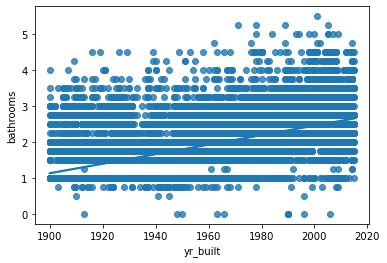

In [72]:
 sns.regplot(x=numerical['yr_built'],y=numerical.bathrooms)

In [17]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,waterfront,view,condition,grade,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,1955,0,0,0,3,7,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,1951,1991,0,0,3,7,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,1933,0,0,0,3,6,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,1965,0,0,0,5,7,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,1987,0,0,0,3,8,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20964,360000.0,3,2.50,1530,1131,3.0,2009,0,0,0,3,8,98103,47.6993,-122.346
20965,400000.0,4,2.50,2310,5813,2.0,2014,0,0,0,3,8,98146,47.5107,-122.362
20966,402101.0,2,0.75,1020,1350,2.0,2009,0,0,0,3,7,98144,47.5944,-122.299
20967,400000.0,3,2.50,1600,2388,2.0,2004,0,0,0,3,8,98027,47.5345,-122.069


# Hypothesis

In [43]:
X1 = X.loc[X["price"] > 650000]
X2 = X.loc[X["price"] < 650000]

X1.describe()
X2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront,view,condition,grade,zipcode,lat,long,renov
count,3.923000e+03,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000,3923.000000
mean,8.225450e+05,3.743819,2.516123,2734.600816,10360.391537,1.686974,1971.553658,0.009177,0.461637,3.470558,8.573031,98076.805251,47.624102,-122.206696,0.070864
std,1.351623e+05,0.827488,0.676784,767.299028,8889.323061,0.495673,32.910327,0.095366,1.022562,0.690016,1.074225,50.771486,0.069354,0.134140,0.256630
min,6.505000e+05,0.000000,0.000000,890.000000,520.000000,1.000000,1900.000000,0.000000,0.000000,1.000000,5.000000,98003.000000,47.301700,-122.464000,0.000000
25%,7.150000e+05,3.000000,2.250000,2200.000000,5000.000000,1.000000,1949.000000,0.000000,0.000000,3.000000,8.000000,98033.000000,47.573100,-122.325500,0.000000
50%,7.900000e+05,4.000000,2.500000,2700.000000,7680.000000,2.000000,1979.000000,0.000000,0.000000,3.000000,9.000000,98074.000000,47.633200,-122.205000,0.000000
75%,9.000000e+05,4.000000,2.750000,3220.000000,11453.500000,2.000000,2001.000000,0.000000,0.000000,4.000000,9.000000,98115.000000,47.676700,-122.106000,0.000000
max,1.200000e+06,6.000000,5.500000,5960.000000,49658.000000,3.500000,2015.000000,1.000000,4.000000,5.000000,12.000000,98199.000000,47.776400,-121.730000,1.000000


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront,view,condition,grade,zipcode,lat,long,renov
count,15727.000000,15727.000000,15727.000000,15727.000000,15727.000000,15727.000000,15727.00000,15727.000000,15727.000000,15727.000000,15727.000000,15727.000000,15727.000000,15727.000000,15727.000000
mean,390653.011445,3.213772,1.925065,1761.875374,8613.150887,1.424525,1970.30915,0.001526,0.097539,3.392700,7.261906,98080.488968,47.542873,-122.222586,0.029376
std,127157.609621,0.842005,0.663325,623.217220,7017.316631,0.536942,28.41150,0.039036,0.470304,0.635979,0.844226,54.411213,0.147504,0.138502,0.168864
min,75000.000000,0.000000,0.000000,290.000000,572.000000,1.000000,1900.00000,0.000000,0.000000,1.000000,1.000000,98001.000000,47.155900,-122.512000,0.000000
25%,289000.000000,3.000000,1.500000,1300.000000,5000.000000,1.000000,1951.00000,0.000000,0.000000,3.000000,7.000000,98033.000000,47.431000,-122.333000,0.000000
50%,381000.000000,3.000000,2.000000,1690.000000,7326.000000,1.000000,1972.00000,0.000000,0.000000,3.000000,7.000000,98065.000000,47.543400,-122.261000,0.000000
75%,490000.000000,4.000000,2.500000,2140.000000,9643.000000,2.000000,1994.00000,0.000000,0.000000,4.000000,8.000000,98122.000000,47.682100,-122.146000,0.000000
max,649990.000000,6.000000,5.250000,5461.000000,49928.000000,3.500000,2015.00000,1.000000,4.000000,5.000000,11.000000,98199.000000,47.777600,-121.315000,1.000000


650: sqft living 2846 vs 1774, year renovated yes vs no, waterfront yes vs no

In [46]:
sam1= X1['waterfront']
sam2 = X2['waterfront']
xb1 = sam1.mean()
xb2 = sam2.mean()
s1 = sam1.std()
s2= sam2.std()
n= len(sam1)
print('> 650 K waterfronthas an avergae of:' , xb1, 'with a stdev of', round(s1,3))
print('< 650 K waterfronthas an avergae of:' , round(xb2,2), 'with a stdev of', round(s2,3))

> 650 K waterfronthas an avergae of: 0.009176650522559266 with a stdev of 0.095
< 650 K waterfronthas an avergae of: 0.0 with a stdev of 0.039


### Equal variances

In [48]:
var1 = np.var(sam1)
var2 = np.var(sam2)
var2/var1

0.16757980228237282

### Seting H0 & H1

H0: xb1 - xb2 =0

H1: xb1 - xb2 <0

In [50]:
#t= (sample_mean(x1) - sample_mean(x2)) / sqrt(square(s1)/n1 + square(s2)/n2 )
t = (xb1 - xb2 )/(np.sqrt(pow(s1,2)/n + pow(s2,2)/n))
t

4.65020891317184

 **if t stat > t-vale reject H0**
 
 4.6 > 1.734
 
 **Reject H0**

## Second Hyp

In [55]:
sam1= X1['renov']
sam2 = X2['renov']
xb1 = sam1.mean()
xb2 = sam2.mean()
s1 = sam1.std()
s2= sam2.std()
n= len(sam1)
print('> 650 K renov thas an avergae of:' , xb1, 'with a stdev of', round(s1,3))
print('< 650 K renov has an avergae of:' , round(xb2,2), 'with a stdev of', round(s2,3))

> 650 K renov thas an avergae of: 0.07086413459087433 with a stdev of 0.257
< 650 K renov has an avergae of: 0.03 with a stdev of 0.169


In [56]:
var1 = np.var(sam1)
var2 = np.var(sam2)
var2/var1

0.4330532460508846

In [57]:
#t= (sample_mean(x1) - sample_mean(x2)) / sqrt(square(s1)/n1 + square(s2)/n2 )
t = (xb1 - xb2 )/(np.sqrt(pow(s1,2)/n + pow(s2,2)/n))
t

8.458703669017336